# Рынок заведений общественного питания Москвы

## Описание исследования

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Перед постановкой основных целей исследования необходимо еще раз обратить внимание на входные данные.
"Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы."
Из данной формулировки можно выявить главное:

- Тип объекта? Кафе.

- Где? В Москве.

- Количество посадочных мест? Небольшое.

- Главная особенность? Гостей должны обслуживать роботы.

**Цель исследования:**

1. Провести первичный анализ данных и, если это необходимо, выполнить их предобработку.

2. Проанализировать количество видов объектов общественного питания и сделать вывод о целесообразности открытия именно кафе.

3. Проанализировать количество сетевых и несетевых объектов общественного питания и сделать вывод о целесообразности покупки франшизы какой-либо крупной сети.

4. Проанализировать среднее количество посадочных мест всех видов объектов общественного питания и выявить какое количество будет оптимальным.

5. Проанализировать на какой улице и в каком районе Москвы наиболее рационально отрыть объект общественного питания.

6. Продумать дальнейшее развитие заведения.

7. Составить общий вывод и рекомендации.

8. На основе всего исследования сделать презентацию для инвесторов.

## Импорт и первичный анализ датафрейма

В первую очередь импортируем все необходимые для исследования библиотеки.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Теперь откроем датафрейм и запишем его в переменную `df`.

In [2]:
#открытие и запись датафрейма в переменную df
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
#посмотрим первые 10 строк датафрейма
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Датафрейм корректно записался в переменную `df`, соблюдая все разделители. На первый взгляд в данных нет каких-то аномалий и нарушения типов данных. Для более детального анализа выведем общую информацию с помощью метода `info()`. 

In [4]:
#вывод общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Видим, что нам очень повезло - датафрейм без пропусков. А также типы данных всех столбцов корретно соблюдены.

Среди категориальных данных представлены следующие столбцы:

- `chain`;

- `object_type`;

Среди количественных переменных представлен только один столбец `number`.

**Анализ категориальных переменных**

Проведем анализ категориальных переменных с помощью метода `value_counts()`.

In [5]:
#анализ столбца chain
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [6]:
#анализ столбца object_type
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Видим, что переменные `chain` и `object_type` не содержат в себе некорректных категорий.

**Анализ количественных переменных**

In [7]:
#анализ столбца number
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

В столбце `number` также не выявлены аномальные значения. Существует значение 1700 посадочных мест, такое количество вполне возможно, например, в большом концертном зале, который вне выступлений артистов является рестораном или баром. Существует значение 0 посадочных мест, что тоже возможно, например, в магазине с отделом кулинарии.

**Анализ наличия дубликатов**

Теперь проанализируем наличие дубликатов в представленном датафрейме. Для этого используем методы `duplicated()` и `sum()`.

In [8]:
#проверка дубликатов по всему датафрейму
df.duplicated().sum()

0

По всему датафрейму у нас нет полностью совпадающих строк.

Можно также проанализировать наличие дублей в столбце `id`. Так как этот атрибут является первичным ключом и существование в нем дублей недопустимо.

In [9]:
#проверка дубликатов по столбцу id
df['id'].duplicated().sum()

0

В атрибуте `id` также не выявлено дубликатов.

**Итог:**

На вход мы получили совершенно чистый датафрейм - без дубликатов и пропусков, а также с корректными типами данных. Можно приступить к основному исследованию.

## Исследование соотношения видов объектов общественного питания по количеству

В данном пункте исследования нам необходимо проанализировать рациональность открытия именно кафе. Возможно, данные покажут, что стоит открыть ресторан или какой-либо другой вид объекта общественного питания.

Для подготовки данных создадим отдельный датафрейм `df_type_count`, в котором будет содержаться количество объектов общественного питания в зависимости от типа.

Датафрейм будет собираться с помощью метода `value_counts()`, примененного к столбцу `object_type`. Применим также метод `reset_index()` для добавления третьего столбца - индекса. Это позволит нам работать с `df_type_count` как с объектом типа DataFrame, а не Series.

In [10]:
#создание нового датафрейма с количеством видов объектов общественного питания
df_type_count = df['object_type'].value_counts().reset_index()

Датафрейм создан, но для более комфортной работы необходимо переименовать столбцы.

In [11]:
#переименование столбцов в созданном датафрейме df_type_count
df_type_count = df_type_count.rename(columns = {'index' : 'object_type', 'object_type' : 'object_count'})

In [12]:
df_type_count

,object_type,object_count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Датафрейм готов. Теперь для большей наглядности построим столбчатую диаграмму.

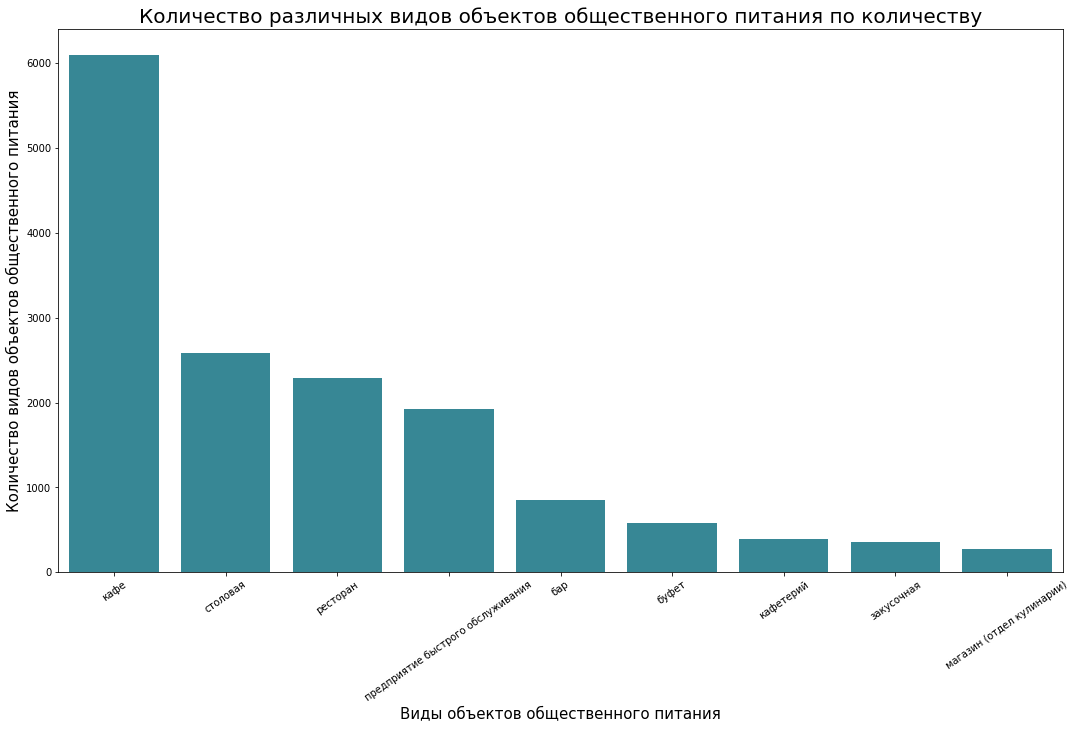

In [13]:
#изменение размера диаграммы
plt.figure(figsize = (18, 10))

#построение столбчатой диаграммы цвета "#83c2bc"
ax = sns.barplot(x = df_type_count['object_type'], y = df_type_count['object_count'], color = '#2792a5')

#присвоение заголовка диаграмме размером 20 пунктов
ax.set_title('Количество различных видов объектов общественного питания по количеству', fontsize = 20)

#присвоение заголовка оси X размером 15 пунктов
ax.set_xlabel('Виды объектов общественного питания', fontsize = 15)

#присвоение заголовка оси Y размером 15 пунктов
ax.set_ylabel('Количество видов объектов общественного питания', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 35)

plt.show()

Типов объектов общественного питания довольно много. Поэтому выберем только те, которые подойдут под концепцию идеи обслуживания роботами.

К таким типам объектов можно отнести:

- кафе;

- столовая;

- ресторан;

- предприятия быстрого обслуживания.

Сложно уловить разницу между кафе и, например, предприятием быстрого обслуживания. Поэтому обратимся к внешнему источнику и выделим определения необходимых типов объектов.

Определения из [классификации предприятий общественного питания](https://www.consultant.ru/document/cons_doc_LAW_135474/53a2c9fb24fa23a594c4eb96dac214ef0d67e48f/) можно кратко описать:

- Кафе. Реализует собственные блюда, но не дотягивает до ресторана по ассортименту и сложности блюд.

- Столовая. Имеет строго определенное меню, различающееся по дням недели.

- Ресторан. Реализует широкий ассортимент блюд высокого уровня сложности.

- Предприятие быстрого обслуживания. Реализует узкий ассортимент блюд несложного уровня сложности в основном из полуфабрикатов.

График показывает, что объектов типа "кафе" больше всех на рынке. Столовые, рестораны, предприятия быстрого обслуживания сильно отстают.

В кафе роботы могут готовить некоторые блюда и обслуживать людей в качестве официантов. С одной стороны, если мы будем отрывать кафе, то столкнемся с сильной конкуренцией. Но роботы смогут привлечь клиентов  по крайней мере на первых порах. Конечно, эффект "вау" может пройти уже после первого посещения нашего заведения, поэтому необходимо поработать над интерьером кафе и качеством блюд.

В столовой роботы могут накладывать выбранную еду, ставить ее на подносы и, возможно, доставлять до столов гостей. Но мало кто приходит в столовую испытать чувство удивления от обслуживания роботами. Также большая часть людей будет приходить в столовую только по будням и во время бизнес-ланчей, поэтому толку от дорогостоящих роботов будет немного.

В ресторане роботы могут выполнять ту же роль, что и в кафе, но есть один минус. Большинство блюд в ресторанах являются сложными и необычными, поэтому гостям может понадобиться консультация официантов. При всём научном прогрессе, которого человечество смогло добиться, робот не сможет достоверно проконсультировать гостей в выборе блюд.

В предприятии быстрого обслуживания роботы могут разогревать полуфабрикаты и обслуживать гостей, но в данном случае ситуация аналогична столовой. Мало людей придут в предприятие быстрого обслуживания, чтобы удивиться роботам. Скорее люди придут, чтобы просто купить перекус.

**Итог:**

На данный момент объект типа "кафе" подходит нам наилучшим образом как с точки зрения основной особенности заведения, так и с точки зрения ситуации на рынке объектов общественного питания.

## Исследование соотношения сетевых и несетевых заведений по количеству

Мы более или менее определились, какой объект общественного питания будем открывать. Но, возможно, стоит присмотреться к покупке франшизы какой-либо крупной сети общественного питания. Поэтому в данном пункте исследования проанализируем сетевые и несетевые объекты общественного питания по количеству. Для этого построим круговую диаграмму.

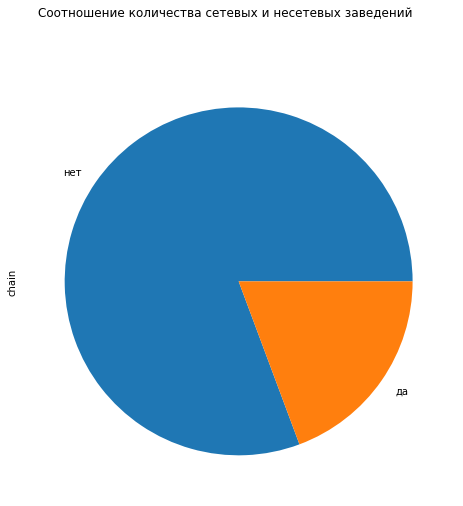

In [14]:
#построение круговой диаграммы
(
    df['chain']
    .value_counts()
    .plot
    .pie(subplots=True,
         figsize=(15, 8),
         title = 'Соотношение количества сетевых и несетевых заведений')
)
plt.show()

По графику видно, что на рынке значительное преимущество по общему количеству имеют несетевые заведения общественного питания.

Статистика показывает, что за покупку франшизы крупной сети заведений возьмется далеко не каждый. С одной стороны франшиза это готовое решение и цена франшизы уже включает в себя траты на раскручивание бренда. Но с другой стороны, во франшизу тяжело привнести какие-либо новые идеи, например, обслуживание гостей роботами. А также реализация заведения с необычной идеей, которая понравится людям, может оказаться более выгодным решением на длительной дистанции.

Рассмотрим сетевые и несетевые объекты общепита в разрезе видов объектов.

## Исследование видов объектов общепита, для которых характерно сетевое распространение

Для проведения данного исследования необходимо создать сводную таблицу, в которой в качестве индексов будут выступать типы объектов общественного питания, а качестве столбцов ранжирование по сетевым или несетевым объектам. Реализуем эту идею с помощью метода `pivot_table()`.

In [15]:
df.pivot_table(index = 'object_type', columns = 'chain', aggfunc = 'count')['id']

chain,да,нет
object_type,,
бар,37,819
буфет,11,574
закусочная,56,304
кафе,1396,4703
кафетерий,52,346
магазин (отдел кулинарии),78,195
предприятие быстрого обслуживания,791,1132
ресторан,544,1741
столовая,3,2584


Результат есть, но он не очень наглядный, поэтому создадим столбчатую диаграмму, которая будет визуализировать числа из сводной таблицы.

Так как в столбчатой диаграмме обходимо отразить только распределение категориального столбца `object_type`, применим метод `countplot()`. С помощью параметра `hue` разделим типы объектов общественного питания на сетевые или несетевые.

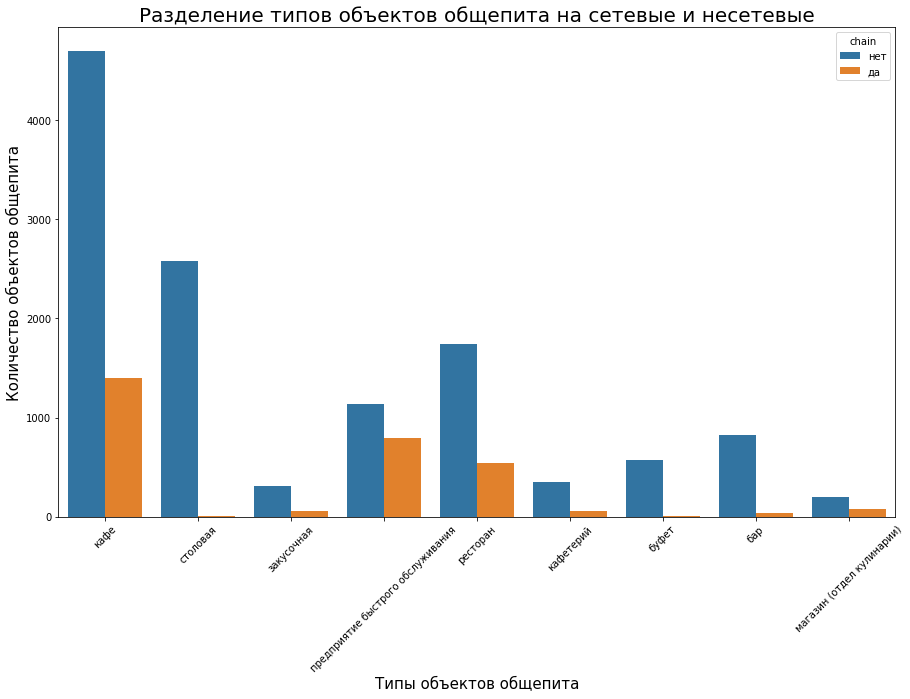

In [16]:
#изменение размеров диаграммы
plt.figure(figsize = (15, 9))

#построение столбчатой диаграммы
ax = sns.countplot(data = df, x = 'object_type', hue = 'chain')

#установка заголовка размером 20 пунктов
ax.set_title('Разделение типов объектов общепита на сетевые и несетевые', fontsize = 20)

#установка подписи к оси X размером 12 пунктов
ax.set_xlabel('Типы объектов общепита', fontsize = 15)

#установка подписи к оси Y размером 12 пунктов
ax.set_ylabel('Количество объектов общепита', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 45)

plt.show()

In [17]:
#подсчет процента сетевых заведений среди кафе 
(1396 / 4703) * 100

29.68318094833085

С графиком намного нагляднее.

Видим, что тип "кафе" единолично находится на первом месте. Также предприятия быстрого обслуживания и рестораны являются значительной частью всех сетевых заведений. Любопытно, что среди столовых практически нет сетевых объектов.

В данном пункте исследования можно сделать вывод, что, несмотря на результат исследования в п.4, при более детальном рассмотрении не все так очевидно. При выбранном ранее виде заведения "кафе" мы столкнемся с сильной конкуренцией. Почти 30% этой конкуренции будут составлять сетевые заведения, то есть достаточно крупные бренды. Однако эти заведения являются по сути одинаковыми, то есть с однотипной кухней и интерьером. Поэтому есть смысл зайти на рынок кафе с новой оригинальной идеей и, конечно, вкусной кухней. Если наше кафе станет популярным среди людей, можно задуматься об открытии еще одного филиала, но в другом районе города.

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Ранее мы уже исследовали, что сетевых заведений сильно меньше, чем несетевых. Напрашивается гипотеза, что сетевые заведения делают ставку на небольшое количество объектов при большом количестве посадочных мест.

Для доказательства или опровержения этой гипотезы используем диаграммы размаха (метод `boxplot`).

Сначала проанализируем посадочные места с разбиением на сетевые и несетевые заведения.

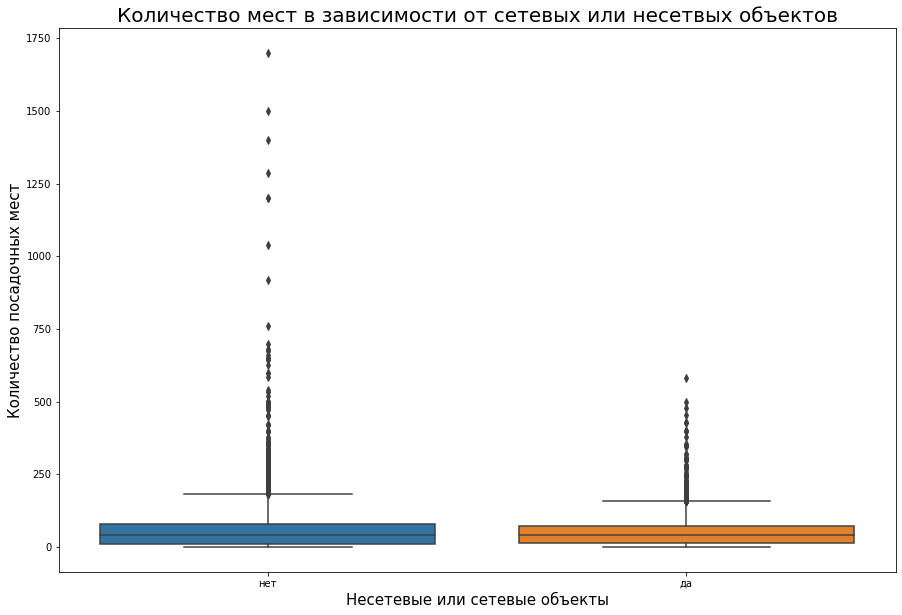

In [18]:
#изменение размеров диаграммы
plt.figure(figsize = (15, 10))

#построение диаграммы размаха
ax = sns.boxplot(data = df, x = 'chain', y = 'number')

#установка заголовка размером 20 пунктов
ax.set_title('Количество мест в зависимости от сетевых или несетвых объектов', fontsize = 20)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Несетевые или сетевые объекты', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Количество посадочных мест', fontsize = 15)

plt.show()

Небольшой перевес по количеству мест у несетевых заведений. Пока наша гипотеза опровергается. Попробуем проанализировать диаграмму размаха относительно типов объектов общественного питания, добавив разделение на сетевые или несетевые с помощью параметра `hue`.

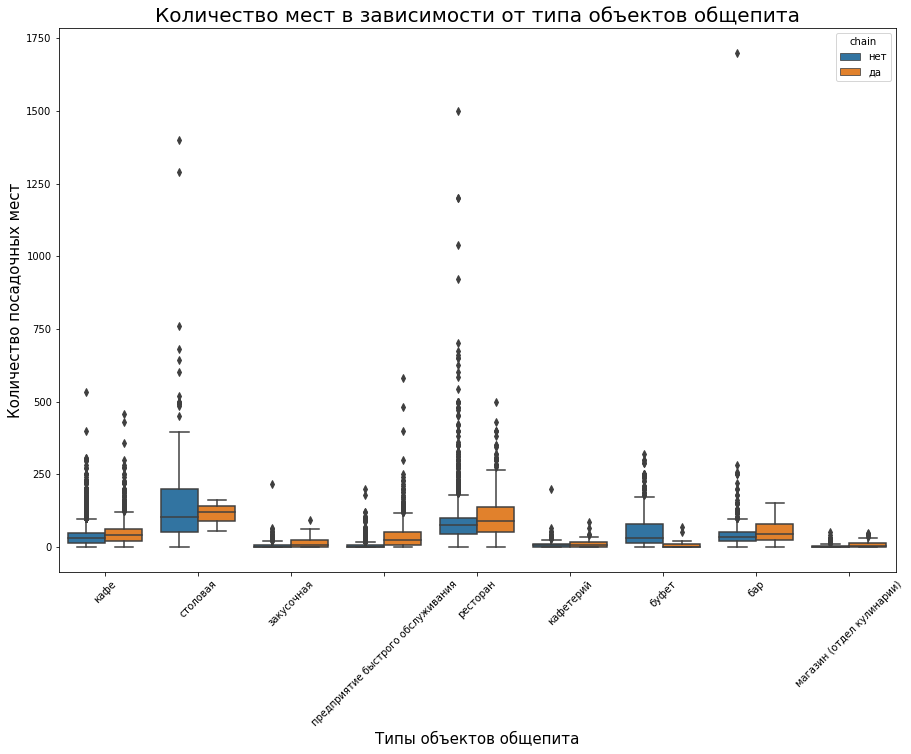

In [19]:
#изменение размеров диаграммы
plt.figure(figsize = (15, 10))

#построение диаграммы размаха
ax = sns.boxplot(data = df, x = 'object_type', y = 'number', hue = 'chain')

#установка заголовка размером 20 пунктов
ax.set_title('Количество мест в зависимости от типа объектов общепита', fontsize = 20)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Типы объектов общепита', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Количество посадочных мест', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 45)

plt.show()

Видим, что теперь ситуация не так очевидна. Почти все сетевые типы заведений содержат больше посадочных мест, чем несетевые. Исключение составляет тип "столовая". Этот вид сильно влияет на общую ситуацию, показанную на графике выше. При том, что среди столовых почти нет сетевых заведений. 

По данному графику можно сделать вывод, что почти все сетевые типы объектов общественного питания содержат большее количество посадочных мест, чем несетевые. Следовательно, для сетевых заведений характерно небольшое количество заведений с относительно большим количеством посадочных мест, то есть наша гипотеза подтверждается.

Изначально у нас было вводное условие по количеству посадочных мест. Количество должно быть небольшим. Судя по графику выше, при покупке франшизы какой-либо крупной сети кафе, количество посадочных мест должно быть больше, чем при создании нового заведения. При условии создания небольшого заведения, это идет больше в минус, чем в плюс. Это является еще одним аргументом в пользу создания собственного заведения, а не покупки франшизы.

## Исследование среднего количества посадочных мест

В предыдущем исследовании можно было задаться вопросом: какое количество посадочных мест соответствует понятию "небольшое"? Выясним с помощью данных. Для этого с помощью группировки столбца `object_type` создадим отдельный датафрейм `df_number_mean`. Для более детального анализа применим к группировке следующие функции: `count`, `mean` и `median`. Для удобства отсортируем значения по столбцу `median` в порядке убывания.

In [20]:
#создания датафрейма df_number_mean
df_number_mean = (
        df
        .groupby('object_type')
        .agg(['count', 'mean', 'median'])['number']
        .reset_index()
        .sort_values('median', ascending = False)
       )

In [21]:
df_number_mean

,object_type,count,mean,median
8,столовая,2587,130.246618,103
7,ресторан,2285,96.834136,80
0,бар,856,43.494159,35
1,буфет,585,51.129915,32
3,кафе,6099,39.716019,30
4,кафетерий,398,9.123116,6
6,предприятие быстрого обслуживания,1923,20.552262,5
2,закусочная,360,7.608333,0
5,магазин (отдел кулинарии),273,5.589744,0


По средним показателям тип "столовая" имеет наибольшее количество посадочных мест. Для лучшего понимания насколько сильно отстают все остальные типы объекты общественного питания, построим столбчатую диаграмму по столбцу `median`.

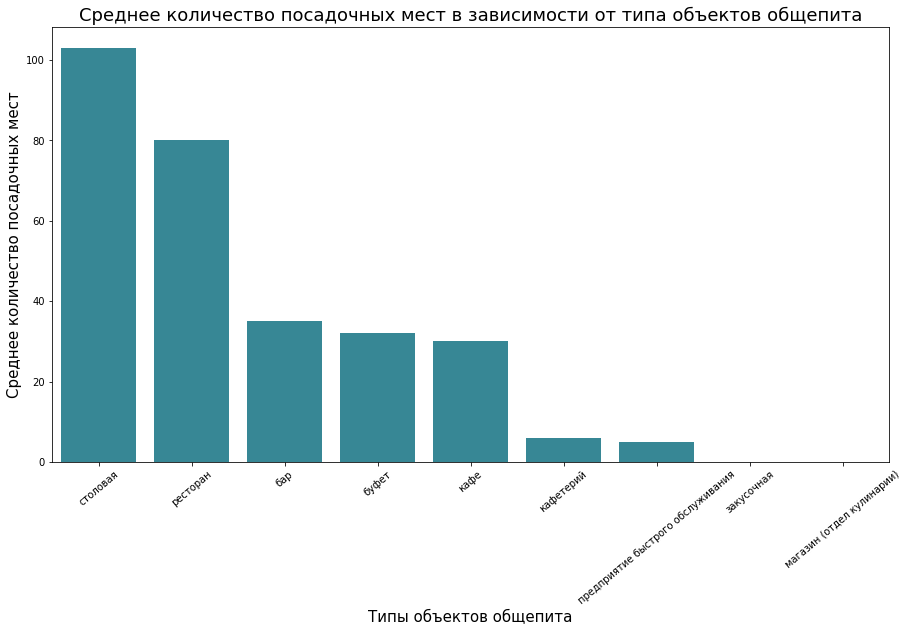

In [22]:
#изменение размеров графика
plt.figure(figsize = (15, 8))

#построение столбчатой диаграммы
ax = sns.barplot(data = df_number_mean, x = 'object_type', y = 'median', color = '#2792a5')

#установка заголовка размером 18 пунктов
ax.set_title('Среднее количество посадочных мест в зависимости от типа объектов общепита', fontsize = 18)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Типы объектов общепита', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Среднее количество посадочных мест', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 40)

plt.show()

Столовые и рестораны уходят далеко вперед. Проанализируем среднее количество посадочных мест более детально с помощью метода `boxplot()`.

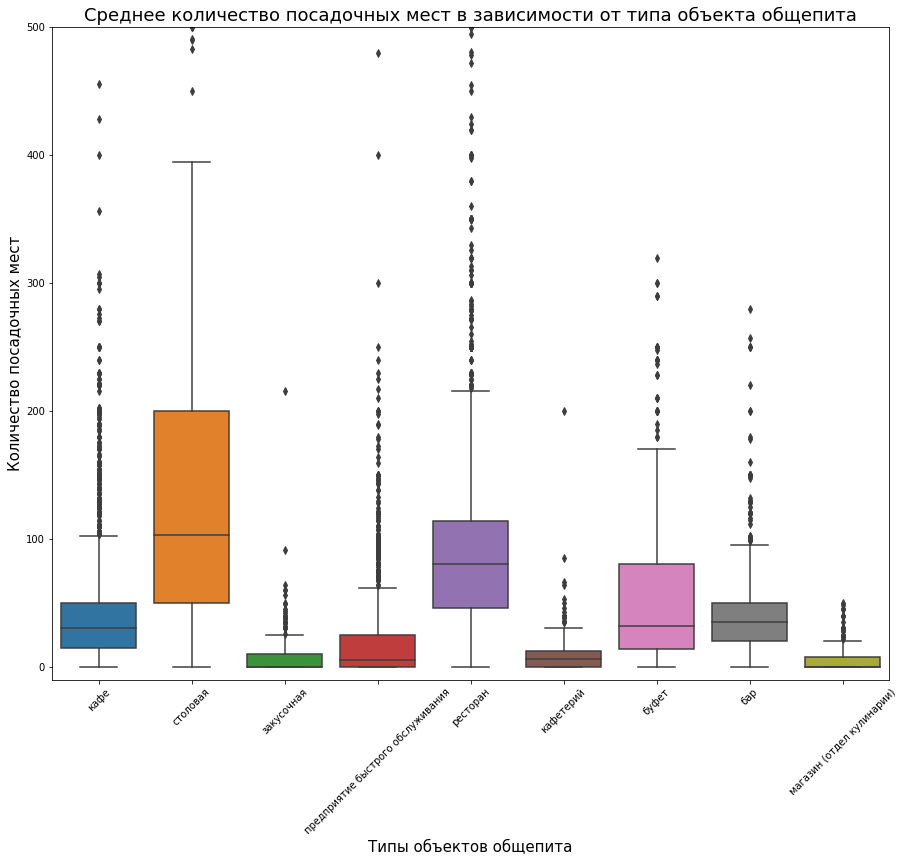

In [23]:
#изменение размеров диаграммы
plt.figure(figsize = (15, 12))

#построение диаграммы размаха
ax = sns.boxplot(data = df, x = 'object_type', y = 'number')

#установка заголовка размером 20 пунктов
ax.set_title('Среднее количество посадочных мест в зависимости от типа объекта общепита', fontsize = 18)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Типы объектов общепита', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Количество посадочных мест', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 45)

plt.ylim(-10, 500)

plt.show()

На данному графику, можно убедиться, что столовые имеют наибольшее количество посадочных мест.

На втором месте находятся рестораны, хотя у них гораздо больше заведений, которые выбиваются за границы максимального значения.

Что касается кафе, то здесь также много значений, выходящих за границу, поэтому рациональнее делать вывод о среднем количестве мест в заведениях подобного типа по медиане, так как выбивающиеся значения сильно влияют на среднее арифметическое. Следовательно, по медиане посадочных мест (30 для кафе) можно сказать, что оптимальное число мест, которое соответствует понятию "небольшое", равно 20-25.

## Выделение в отдельный столбец информации об улице

Для выбора наиболее выгодного месторасположения, необходимо выделить улицу из общего адреса.

Сделаем это действие с помощью следующего алгоритма:

1. Создадим внешний список `street_list`.

2. Создадим функцию `address_parsing`, в которой разделим по символу ", " адрес на части.

3. Пройдемся по каждой части общего адреса и ту часть, в которой есть слово из списка `street_list`, выводим в новый столбец `street`.

In [24]:
street_list = ['улица',
               'проспект',
               'проезд',
               'шоссе',
               'переулок',
               'бульвар',
               'набережная',
               'площадь',
               'аллея',
               'линия',
               'микрорайон']

In [25]:
def address_parsing(address):
    
    #разделение общего адреса по символу ", " и проверка каждой части на наличие слова из списка street_list
    for address_part in address.split(', '):
        
        for street_part in street_list:
            
            #провеока наличия слова из списка street_list в части адреса
            if street_part in address_part:
                
                return address_part

In [26]:
#применяем функцию address_parsing к столбцу address
df['street'] = df['address'].apply(address_parsing)

In [27]:
#проверяем корректность функции
df[['address', 'street']].head(10)

,address,street
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица
5,"город Москва, Абрамцевская улица, дом 15, корп...",Абрамцевская улица
6,"город Москва, переулок Сивцев Вражек, дом 6/2",переулок Сивцев Вражек
7,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица
8,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица
9,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица


Функция работает корректно, теперь можем приступить к анализу оптимального месторасположения.

## Исследование топ-10 улиц по количеству объектов общественного питания

Для данного исследования создадим отдельный датафрейм `df_rest_count`, в котором будет содержаться количество заведений общественного питания для каждой улицы. Этот датафрейм будет построен на основе группировки по столбцу `street` с применением агрегирующей функции `count`. Отсортируем датафрейм по убыванию.

In [28]:
#создание датафрейма df_rest_count с помощью группировки по столбцу street и применением метода count
df_rest_count = (
    df.groupby('street')['id']
    .agg('count')
    .sort_values(ascending = False)
    .reset_index()
)

Для удобства переименуем столбцы в созданном датафрейме.

In [29]:
#переименование столбцов
df_rest_count.columns = ['street', 'rest_number']

In [30]:
#вывод топ-10 улиц по количеству заведений
df_rest_count.head(10)

,street,rest_number
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Для лучшей визуализации построим столбчатую диаграмму. Запишем названия улиц во внешний список `df_top_10_street`, и при построении самой диаграммы отфильтруем улицы по этому списку.

In [31]:
#создание списка топ-10 улиц по количеству заведений
df_top_10_street = list(df_rest_count['street'])[0:10]

In [32]:
#вывод списка топ-10 улиц по количеству заведений
df_top_10_street

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

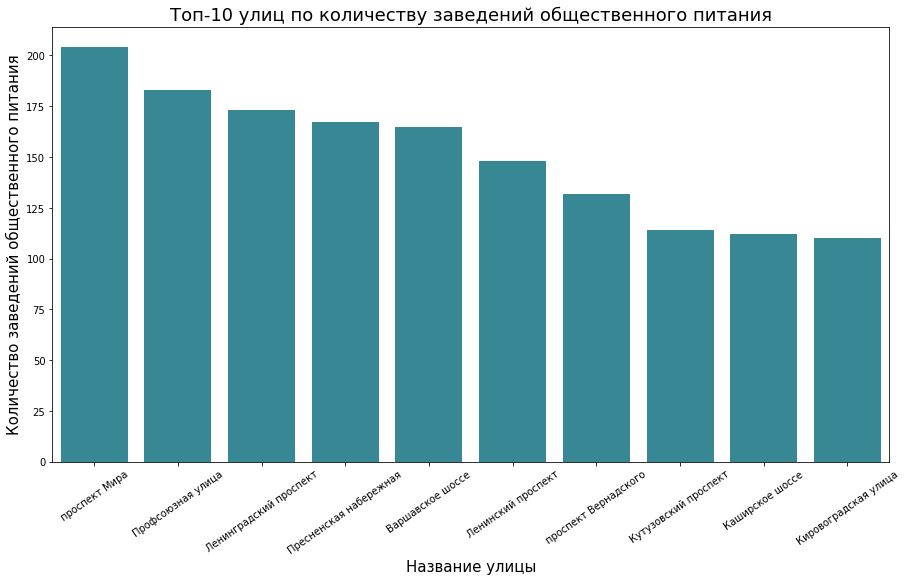

In [33]:
#изменение размеров диаграммы
plt.figure(figsize = (15, 8))

#построение столбчатой диаграммы для улиц из списка df_top_10_street 
ax = sns.barplot(data = df_rest_count.query('street in @df_top_10_street'), x = 'street', y = 'rest_number', color = '#2792a5')

#установка заголовка размером 18 пунктов
ax.set_title('Топ-10 улиц по количеству заведений общественного питания', fontsize = 18)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Название улицы', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Количество заведений общественного питания', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 35)

plt.show()

Результаты удивляют. Все улицы содержат в себе больше 100, а некоторые даже больше 200 заведений. В данном исследовании очень многое зависит от распределения заведений по данным улицам. Есть 2 возможных варианта распределения:

1. Улицы небольшие по размеру. Поэтому плотность заведений на этих улицах является запредельной, следовательно, конкуренция тоже.

2. Эти улицы очень длинные и расположены в рентабельных районах Москвы. Следовательно, есть вероятность, что распределение заведений общественного питания на данных улицах более или менее равное на протяжении всей длины.

Проверим эти утверждения, с помощью внешнего справочника соответствия улиц районам. Посмотрим сколько районов соответствует каждой улице и сделаем вывод о длине улицы и о плотности расположения заведений.

Запишем csv-файл соответствия улиц районам в переменную `df_areas`. Сам csv-файл хранится во внешней Google-таблице. Достанем ее с помощью библиотеки `requests` и модуля `BytesIO` из библиотеки `io`.

In [34]:
#запись внешней google-таблицы в переменную df_areas
from io import BytesIO
import requests
spreadsheet_id = '18vC7zSktJ2F70yNfQO356DKfDKB8Wu01OyLiqn_kTuw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_areas = pd.read_csv(BytesIO(r.content))
df_areas

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [35]:
#переименование столбцов справочника df_areas
df_areas.columns = ['street', 'areald', 'okrug', 'area']

Теперь присоединим датафреймы `df` и `df_areas` по столбцу `street`. Чтобы данные в датафрейме `df` не потерялись, выполним left-соединение.

In [36]:
#присоединение основного датафремов df с df_areas по столбцу street
df_srteet_area = df.merge(df_areas, on = 'street', how = 'left')

In [37]:
df_srteet_area.head()

,id,object_name,chain,object_type,address,number,street,areald,okrug,area
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,18.0,ЦАО,Таганский район


Наш датафрейм готов. Теперь можно посмотреть какие районы соответствуют каждой улице. Сделаем список соответствия район - улица с помощью следующей последовательности действий:

1. Отфильтруем улицs по списку `df_top_10_street`.

2. Оставим все пары из столбцов `street`, `area`.

3. С помощью метода `drop_duplicates()` удалим все дубликаты, оставив только уникальные пары.

In [38]:
#создание списка соответствия район-улица
df_srteet_area.query('street in @df_top_10_street')[['street', 'area']].drop_duplicates()

,street,area
244,Варшавское шоссе,Район Чертаново Центральное
245,Варшавское шоссе,Район Чертаново Северное
246,Варшавское шоссе,Район Чертаново Южное
247,Варшавское шоссе,Донской район
248,Варшавское шоссе,Район Нагатино-Садовники
249,Варшавское шоссе,Нагорный район
250,Варшавское шоссе,Район Северное Бутово
251,Варшавское шоссе,Район Южное Бутово
304,проспект Вернадского,Район Проспект Вернадского
305,проспект Вернадского,Район Раменки


Видим, что существуют улицы, которые проходят через 8 районов. Можно сделать вывод, что эти улицы являются очень длинными. Для более удобного анализа выведем список улиц и количество соответствующих им районов. Создадим список по тому же алгоритму, что использовали выше, добавив группировку по столбцу `street` и агрегирующую функцию `count`.

In [39]:
#создание списка соответствия улиц количеству районов
(
    df_srteet_area
    .query('street in @df_top_10_street')
    [['street', 'area']]
    .drop_duplicates()
    .groupby('street')
    .agg('count')
    .reset_index()
    .sort_values(by = 'area', ascending = False)
)

,street,area
0,Варшавское шоссе,8
5,Ленинский проспект,8
9,проспект Мира,7
7,Профсоюзная улица,6
8,проспект Вернадского,5
1,Каширское шоссе,4
4,Ленинградский проспект,4
2,Кировоградская улица,3
3,Кутузовский проспект,2
6,Пресненская набережная,1


Теперь понятно почему эти улицы являются лидерами по числу заведений. Они либо очень длинные (как в случае с Варшавским шоссе или Ленинским проспектом), либо находятся в очень рентабельных районах Москвы, что создает большой спрос на открытие новых заведений (как в случае с Кутузовским проспектом или Пресненской набережной).

Возникает вопрос - а что, если заведения на этих улицах сконцентрированы в одном месте, а не по всей длине? Тогда открытие нового несетевого заведения в концентрированном месте будет не лучшим решением ввиду большой конкуренции.

Поэтому нам необходимо проанализировать распределение заведений на этих улицах. Сделаем это с помощью графика вида `stripplot()`. На горизонтальной оси этого графика будут отложены названия улиц, а по вертикальной оси номер дома, в котором находятся заведения.

Для построения такого графика нам необходимо:

1. Вытянуть номер дома из общего адреса в отдельный столбец `house_num`.

2. Привести столбец `house_num` к числовому типу.

3. Построить `stripplot()`, отфильтровав датафрейм по списку `df_top_10_street`.

Чтобы вытянуть номер дома из общего адреса, напишем функцию `house_parssing`, которая похожа на ранее созданную функцию `address_parsing`.

In [40]:
def house_parssing(location):
    
    for location_part in location.split(', '): #разделяем адрес на части по символам ", "
        
        if 'дом' in location_part: #ищем слово "дом" в частях адреса
            
            return location_part.split(' ')[1].split('/')[0] #если находим, делим эту часть по символу " " и возвращаем только номер
        
        #случай split('/')[0] направлен на разделение значений '2/1', в ином случае будет тяжело привести к числовому виду

In [41]:
#применение функции house_parssing к столбцу address
df['house_num'] = df['address'].apply(house_parssing)

Теперь приведем столбец `house_num` к числовому типу данных. Сделаем это действие с помощью функции `to_numeric`, так как она позволяет обработать все исключения, которые еще остались в датафрейме. Например, номер дома "75А" или "3-5"невозможно точно привести к числовому виду. Для обработки исключений, которые невозможно привести к числовому типу, в параметре `errors` будем использовать значение `coerce`. Оно заменит все неудобные значения на значения "NaN".

In [42]:
#преобразование к числовому типу данных
df['house_num'] = pd.to_numeric(df['house_num'], errors = 'coerce')

С помощью метода `info` посмотрим, выполнилось ли преобразование и сколько значений мы потеряли.

In [43]:
#общая информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15012 non-null object
house_num      13077 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 960.5+ KB


Столбец `house_num` имеет тип `float`, но мы потеряли порядка 2000 значений. Безусловно, это много, но примерное распределение заведений мы все равно можем посмотреть.

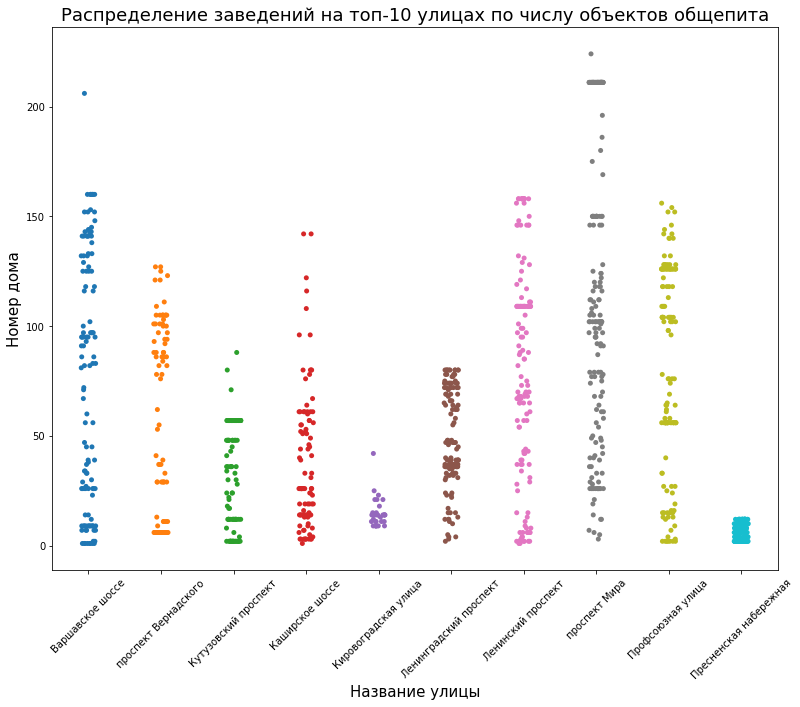

In [44]:
#изменение размеров графика
plt.figure(figsize = (13, 10))

#построение графика stripplot
ax = sns.stripplot(data = df.query('street in @df_top_10_street'), x = 'street', y='house_num')

#установка заголовка размером 18 пунктов
ax.set_title('Распределение заведений на топ-10 улицах по числу объектов общепита', fontsize = 18)

#установка подписи к оси X размером 15 пунктов
ax.set_xlabel('Название улицы', fontsize = 15)

#установка подписи к оси Y размером 15 пунктов
ax.set_ylabel('Номер дома', fontsize = 15)

#изменение угла наклона подписей
plt.xticks(rotation = 45)

plt.show()

Для понимания на каком номере дома начинается и заканчивается улица, сгруппируем датафрейм по столбцу `street` и применим к этой группировке методы `min` и `max`.

In [45]:
df.query('street in @df_top_10_street').groupby('street')['house_num'].agg(['min', 'max'])

,min,max
street,,
Варшавское шоссе,1.0,206.0
Каширское шоссе,1.0,142.0
Кировоградская улица,9.0,42.0
Кутузовский проспект,2.0,88.0
Ленинградский проспект,2.0,80.0
Ленинский проспект,1.0,158.0
Пресненская набережная,2.0,12.0
Профсоюзная улица,2.0,156.0
проспект Вернадского,6.0,127.0


На следующих улицах присутствует сильная концентрация заведений в определенных местах:

- Каширское шоссе.

- Кировоградская улица.

- Ленинградский проспект.

- Проспект Мира.

- Пресненская набережная.

Также по графику видно, что есть улицы с более равным распределением. Например:

- Варшавское шоссе (самая длинная улица из рассматриваемых).

- Проспект Вернадского, Кутузовский проспект (самая короткая).

- Ленинский проспект.

- Профсоюзная улица.

Это улицы, на которых относительно мало "сгустков" заведений общественного питания.

Как и следовало ожидать, все эти улицы сильно забиты объектами общественного питания.  Данный случай показывает, что открытие нового, несетевого кафе на таких улицах не всегда хорошо из-за большой конкуренции. Многие люди могут просто не заметить открытие нового кафе. Попробуем проанализировать улицы с одним объектом общественного питания и среди них выявить наиболее подходящую.

## Исследование улиц с одним объектом общественного питания

Обратимся к ранее созданному датафрейму `df_rest_count`и возьмем все улицы, на которых существует только одно заведение.

In [46]:
#спсиок всех улиц, на которых существует одно заведение
df_rest_count.query('rest_number == 1')

,street,rest_number
1353,Бабаевская улица,1
1354,Аэрофлотская улица,1
1355,Парковая улица,1
1356,Базовая улица,1
1357,улица Клочкова,1
...,...,...
1890,Известковый переулок,1
1891,Изваринская улица,1
1892,Ижорский проезд,1
1893,Иваньковское шоссе,1


Уже сейчас видно, что улиц, на которых находится одно заведение, очень много. Попробуем посмотреть какие районы соответствуют этим улицам. Для этого сохраним названия улиц в отдельный список `df_street_one_rest`, который далее будем использовать для фильтрации датафрейма соответствия улиц районам.

In [47]:
#сохранение улиц в отдельный список
df_street_one_rest = list(df_rest_count.query('rest_number == 1')['street'])

In [48]:
df_street_one_rest

['Бабаевская улица',
 'Аэрофлотская улица',
 'Парковая улица',
 'Базовая улица',
 'улица Клочкова',
 'Богоявленский переулок',
 'улица Кошкина',
 'Больничный переулок',
 'улица Корнея Чуковского',
 'Большая Бутовская улица',
 'Большая Внуковская улица',
 'улица Константинова',
 'Большая Октябрьская улица',
 'улица Крутицкий Вал',
 'улица Капотня',
 'улица Каманина',
 'улица Инессы Арманд',
 'улица Знаменские Садки',
 'улица Зенитчиков',
 'улица Захарьинские Дворики',
 'улица Жуковского',
 'улица Красных Зорь',
 'улица Кубинка',
 'улица Маршала Новикова',
 'улица Максимова',
 'улица Маршала Мерецкова',
 'Балтийская улица',
 'Банный проезд',
 'Барабанный переулок',
 'улица Малые Каменщики',
 'Басовская улица',
 'улица Малая Ордынка',
 'улица Льва Яшина',
 'улица Кутузова',
 'улица Линии Октябрьской Железной Дороги',
 'Берниковская набережная',
 'улица Лефортовский Вал',
 'улица Лапина',
 'улица Кухмистерова',
 'Бескудниковский переулок',
 'Бескудниковский проезд',
 'Библиотечная улица',


In [49]:
#вывод списка соответствия улиц, на которых одно заведение, и районов
(
    df_srteet_area
    .query('street in @df_street_one_rest and ~(area.isna())')[['street', 'area']]
    .drop_duplicates()
)

,street,area
24,Филипповский переулок,Район Арбат
104,Бабаевская улица,Район Сокольники
116,1-й Балтийский переулок,Район Аэропорт
132,улица Демьяна Бедного,Район Хорошево-Мневники
199,Будайская улица,Район Ростокино
...,...,...
27608,1-й Силикатный проезд,Район Хорошево-Мневники
27866,3-й Угрешский проезд,Район Печатники
28258,улица Линии Октябрьской Железной Дороги,Тимирязевский Район
28986,2-й Кадашёвский переулок,Район Якиманка


Как и говорилось ранее, улиц с одним заведением очень много и выбрать из таких улиц набор наиболее подходящих практически нереально. При том, что наличие только одного заведения на улице не гарантирует отсутствие конкуренции или хороший трафик людей. В данной ситуации можно пойти другим путем:
- Сгруппировать улицы с одним заведением по районам.

- Проанализировать, какие районы включают в себя наибольшее количество улиц с одним заведением.

- Посмотреть расположение этих районов и насколько они рентабельны.

- Сделать вывод о целесообразности дальнейшего изучения этих районов и улиц с одним заведением.

In [50]:
#вывод списка районов и количества улиц с одним заведением
(
    df_srteet_area
    .query('street in @df_street_one_rest and ~(area.isna())') #отфильтруемся по улицам из списка df_street_one_rest,также важно, чтобы среди районов отсутствовали пропуски 
    .groupby('area')
    .agg('count')
    .sort_values(by = 'street', ascending = False)
    ['street']
    .reset_index()
)

,area,street
0,Район Хамовники,26
1,Таганский район,25
2,Басманный район,24
3,Тверской район,20
4,Пресненский район,19
...,...,...
96,Алтуфьевский район,1
97,Район Лианозово,1
98,Район Левобережный,1
99,Район Филевский Парк,1


Получилось порядка 100 районов, для данного исследования разберем первые 5.

In [51]:
(
    df_srteet_area
    .query('street in @df_street_one_rest and ~(area.isna())') #отфильтруемся по улицам из списка df_street_one_rest,также важно, чтобы среди районов отсутствовали пропуски 
    .groupby('area')
    .agg('count')
    .sort_values(by = 'street', ascending = False)
    ['street']
    .reset_index()
    .head()
)

,area,street
0,Район Хамовники,26
1,Таганский район,25
2,Басманный район,24
3,Тверской район,20
4,Пресненский район,19


Разберем каждый район в отдельности. Вот что пишут про них в Яндекс-картах:

1. Хамовники – район, в котором проходит одна из самых дорогих улиц – Остоженка. На ней расположены грузинские рестораны и кафе с высокой европейской кухней. На берегу Москвы-реки возвышаются золотые купола храма Христа Спасителя. Кроме того, в этом районе находится Новодевичий монастырь. Построенный в XVI веке архитектурный ансамбль включает в себя Смоленский собор с фресками и Новодевичье кладбище, где похоронены А. П. Чехов и Н. С. Хрущев.

2. Спокойный Таганский район известен благодаря небольшим музеям современного искусства. Кроме того, в районе есть несколько древних церквей, в том числе Покровский монастырь и укрепленный Новоспасский монастырь, где отправляли религиозные обряды Романовы. В расположенном глубоко под землей Бункере-42 времен Холодной войны сейчас работает музей, где можно пройтись по атмосферным тоннелям и увидеть советскую военную технику.

3. Басманный – район с модными барами и центрами современного искусства. На территории района находятся центр современного искусства "Винзавод", расположенный в здании бывшего винного комбината, и центр дизайна Artplay с дизайнерскими студиями, магазинами и уютными кафе. Вокруг старинной Хитровской площади стоят здания в неоклассическом стиле. На площади есть газоны и скамейки. В районе расположен парк "Чистые пруды" с пешеходными дорожками и прудом, на котором в зимние месяцы устраивают ледовый каток.

4. В оживленном космополитичном Тверском районе расположена Красная площадь, на которой находятся собор Василия Блаженного с цветными куполами, Мавзолей Ленина и торговый комплекс "ГУМ" с элитными магазинами. На улицах района много элегантных ресторанов русской кухни и модных коктейль-баров. Ещё одна достопримечательность района – Кремль с Успенским собором XIV века, а также музеями оружия и драгоценных корон. В старинном Большом театре можно посмотреть оперу и балет.

5. Пресненский – элитный район, где расположены Государственный музей искусства народов Востока и тихие Патриаршие пруды. На территории района находятся Московский зоопарк и Московский планетарий с интерактивным музеем. На Большой Никитской улице расположены рестораны европейской и фьюжн-кухни, а также Московский академический театр имени Владимира Маяковского.

Если подвести итог, то это исторические районы Москвы с большим количеством заведений общественного питания, музеев и достопримечательностей.
Очень радует, что на этих районах так много улиц с одним заведением общественного питания, так как это немного уменьшает конкуренцию хотя бы в пределах одной улицы. При этом, эти районы очень рентабельны и ежедневно на их улицах проходит большой трафик как жителей Москвы, так и туристов. Открытие заведения с обслуживающим персоналом в виде роботов может очень понравиться и той и другой категории людей.

Также в этих районах много офисов и бизнес-центров, можно сделать упор на скорость обслуживания роботами во время бизнес-ланчей и, возможно, привлечь категорию деловых людей.

Попробуем вывести набор улиц, которые стоит рассмотреть более детально. Выведем список улиц с одним заведением из перечисленных районов. Для этого создадим еще один внешний список `df_good_area` с названиями необходимых районов. Далее отфильтруем датафрейм `df_srteet_area` по спискам `df_good_area` и `df_street_one_rest`.

In [52]:
#создание списка необходимых районов 
df_good_area = list(
    df_srteet_area
    .query('street in @df_street_one_rest and ~(area.isna())') 
    .groupby('area')
    .agg('count')
    .sort_values(by = 'street', ascending = False)
    ['street']
    .reset_index()
    ['area']
    .head()
)

Так как улиц очень много, выведем первые 7.

In [53]:
df_srteet_area.query('street in @df_street_one_rest and area in @df_good_area')['street'].head(7)

374          Глазовский переулок
504      Воротниковский переулок
729             улица Жуковского
860     2-й Колобовский переулок
890          Кооперативная улица
965      1-й Обыденский переулок
997    Малый Лёвшинский переулок
Name: street, dtype: object

Все эти улицы достойны отдельного рассмотрения и выбора оптимальной для открытия нового кафе. Из выше представленных улиц отдельно можно выделить "1-й Обыденский переулок". Эта улица находится рядом Москвой рекой, храмом Христа Спасителя и станцией метро "Кропоткинская", что создает хороший трафик людей.

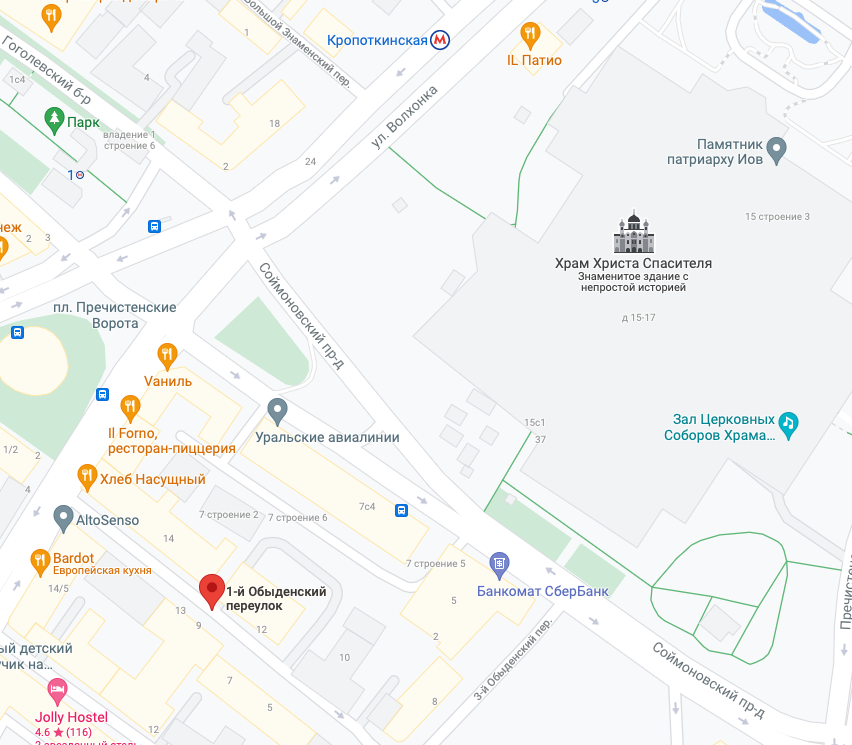

## Исследование распределения количества посадочных мест для улиц с большим количеством объектов общественного питания

Для данного исследования построим 10 графиков распределения посадочных мест для улиц из списка `df_top_10_street` и посмотрим, есть ли среди них что-нибудь общеее.

Так как с точки зрения реализации построение 10 одинаковых графиков является однотипным процессом, напишем функцию `dist_building`, в которой пройдемся по списку `df_top_10_street` и построим график для каждой улицы.

In [54]:
#подадим на вход улицы список улиц
def dist_building(street_list):
    
    for street in street_list:
        
        #изменение размеров диаграммы
        plt.figure(figsize = (7, 7))
        
        #построение диаграммы распределения
        ax = sns.distplot(df[df['street'] == street]['number'], color = '#2792a5')
        
        #изменение заголовков графика 
        ax.set_title(f'Распределение посадочных мест на {street}')
        
        #ограничение оси X
        plt.xlim(0, 180)

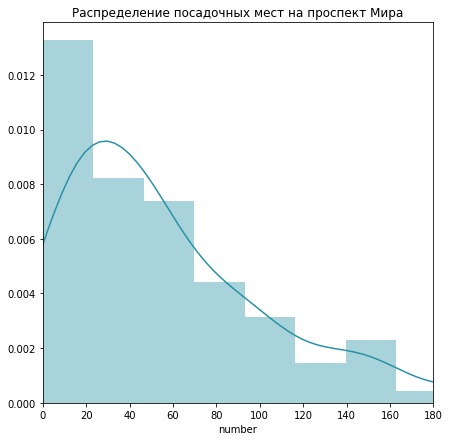

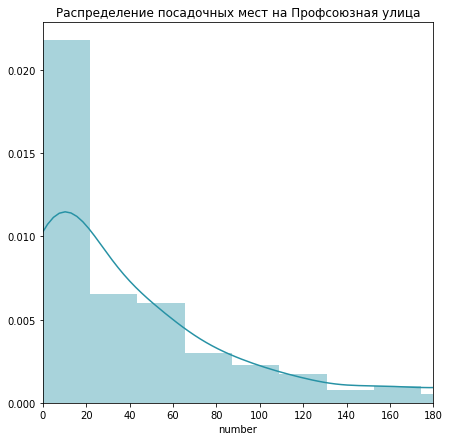

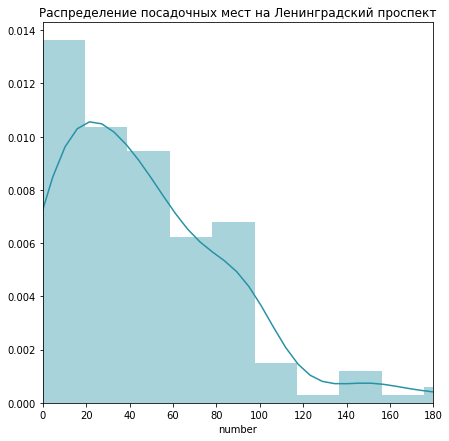

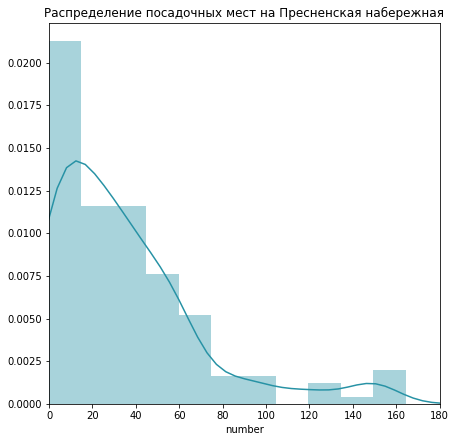

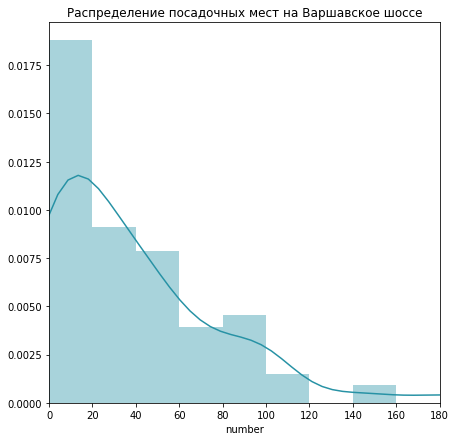

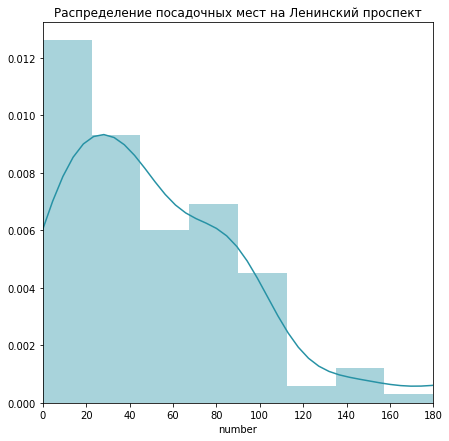

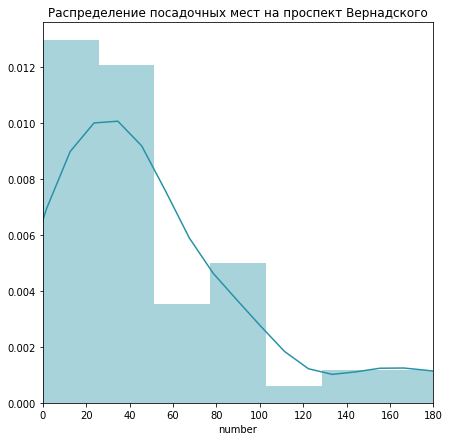

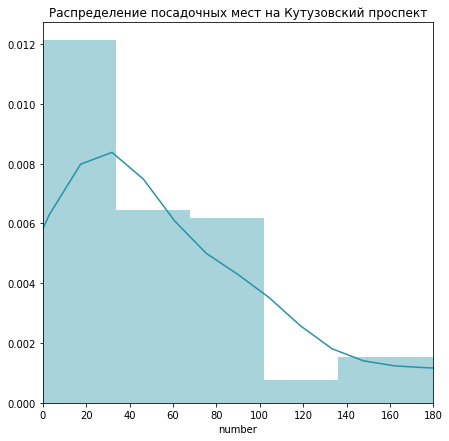

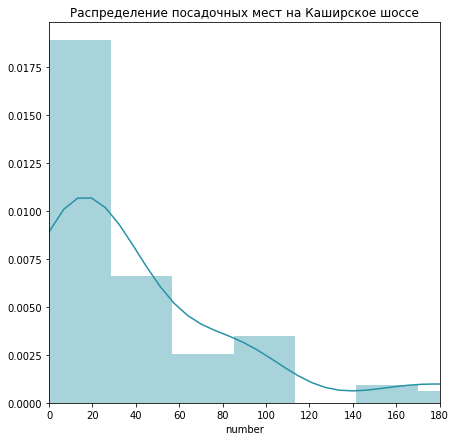

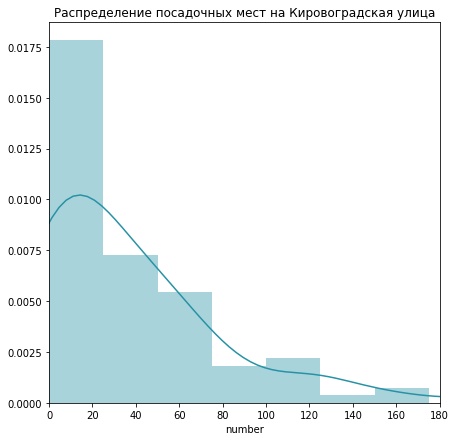

In [55]:
dist_building(df_top_10_street)

Между графиками действительно есть что-то общее. Разберем все общие диапазоны, представленные на графике:

- 0-30 - наиболее популярное количество посадочных мест. Есть предположение, что такое влияние оказывают множество кафе и предприятий быстрого обслуживания, расположенных на улицах из списка `df_top_10_street`.


- 30-80 - резкий спад. Скорее всего большинство из таких заведений это нетипично большие кафе или небольшие рестораны.


- 80-100 - небольшой подъем. Здесь уже большое влияние оказывают рестораны.


- 100-120 - снова спад. Скорее всего связан тем, что для ресторанов такое количество мест является большим, а для столовых нужно больше посадочных мест.


- 120-160 - снова небольшой подъем. Это можно объяснить влиянием большого количества столовых на этих улицах.

Проверим наши рассуждения. Выведем сводную таблицу, в которой для каждого типа объекта общественного питания и для каждой улицы из списка `df_top_10_street` будет обозначено значение медианы посадочных мест.

In [56]:
#сводная таблица значеинй медианы для каждого типа объекта и улицы
(
    df
    .query('street in @df_top_10_street')
    .pivot_table(index = 'object_type', columns = 'street', values = 'number', aggfunc = ['median'])
)

median                  \
street                            Варшавское шоссе Каширское шоссе   
object_type                                                          
бар                                           31.0            22.5   
буфет                                          9.0            16.0   
закусочная                                     3.5             NaN   
кафе                                          30.0            31.5   
кафетерий                                      8.0             8.5   
магазин (отдел кулинарии)                      1.0             NaN   
предприятие быстрого обслуживания              2.0             6.0   
ресторан                                      98.0            80.0   
столовая                                      60.0           100.0   

                                                                             \
street                            Кировоградская улица Кутузовский проспект   
object_type                                                                   
бар                                               55.0                 47.5   
буфет                                             24.0                 15.0   
закусочная                                        27.5                  0.0   
кафе                                              40.0                 30.0   
кафетерий                                          5.0                  NaN   
магазин (отдел кулинарии)                          6.0                  5.0   
предприятие быстрого обслуживания                  6.0                 30.0   
ресторан                                          75.0                 94.0   
столовая                                         240.0                118.0   

                                                                             \
street                            Ленинградский проспект Ленинский проспект   
object_type                                                                   
бар                                                 43.5               14.0   
буфет                                               40.0              133.0   
закусочная                                           NaN                4.0   
кафе                                                32.0               32.0   
кафетерий                                           12.5               12.0   
магазин (отдел кулинарии)                           12.0                NaN   
предприятие быстрого обслуживания                    0.0                4.0   
ресторан                                            67.0               80.0   
столовая                                            60.0               69.0   

                                                                            \
street                            Пресненская набережная Профсоюзная улица   
object_type                                                                  
бар                                                 40.0              35.0   
буфет                                              237.0              30.0   
закусочная                                           NaN               1.0   
кафе                                                25.0              28.0   
кафетерий                                            4.0               4.0   
магазин (отдел кулинарии)                            NaN              12.0   
предприятие быстрого обслуживания                    4.0               0.0   
ресторан                                            50.0              70.0   
столовая                                             NaN             160.0   

                                                                      
street                            проспект Вернадского проспект Мира  
object_type                                                           
бар                                               14.0          50.0  
буфет                                             40.0          28.0  
закусочная   

Действительно, видим, что значению посадочных мест в 0-30 соответствуют: кафе, некоторые буфеты, кафетерии, магазины и предприятия быстрого обслуживания. Значениям посадочных мест в 30-80 соответствуют бары, некоторые небольшие рестораны и большие кафе. Значениям 80 - 160 соответствуют рестораны и столовые.

Но действительно ли количество тех или иных типов заведений общественного питания так сильно влияют на графики распределений? Построим похожую сводную таблицу, только вместо функции `median` будем использовать функцию `count` для подсчета количества каждого типа объекта общественного питания на каждой улице из списка `df_top_10_street`.

In [57]:
#сводная таблица количества заведений для каждой улицы
(
    df
    .query('street in @df_top_10_street')
    .pivot_table(index = 'object_type', columns = 'street', values = 'id', aggfunc = 'count')
)

street,Варшавское шоссе,Каширское шоссе,Кировоградская улица,Кутузовский проспект,Ленинградский проспект,Ленинский проспект,Пресненская набережная,Профсоюзная улица,проспект Вернадского,проспект Мира
object_type,,,,,,,,,,
бар,6.0,2.0,4.0,6.0,10.0,6.0,5.0,5.0,4.0,15.0
буфет,6.0,3.0,1.0,1.0,6.0,2.0,1.0,5.0,5.0,3.0
закусочная,2.0,NaN,4.0,2.0,NaN,1.0,NaN,2.0,2.0,4.0
кафе,66.0,30.0,17.0,41.0,70.0,64.0,98.0,90.0,56.0,103.0
кафетерий,8.0,8.0,2.0,NaN,4.0,3.0,5.0,10.0,3.0,5.0
магазин (отдел кулинарии),2.0,NaN,3.0,2.0,5.0,NaN,NaN,2.0,2.0,8.0
предприятие быстрого обслуживания,41.0,43.0,47.0,8.0,16.0,9.0,18.0,23.0,27.0,26.0
ресторан,9.0,9.0,18.0,48.0,48.0,37.0,40.0,31.0,19.0,32.0
столовая,25.0,17.0,14.0,6.0,14.0,26.0,NaN,15.0,14.0,8.0


Видим, что количество кафе и предприятий быстрого обслуживания очень сильно влияют на тот факт, что диапазон в 0-30 посадочных мест является наиболее популярным среди всех. Количество ресторанов способно повлиять на небольшой подъем в районе 80-100 посадочных мест, а количество столовых, безусловно, влияет на подъем диапазона 120-160 посадочных мест.

Возникает вопрос: а влияют ли сетевые заведения на график распределения? Создадим еще одну сводную таблицу количества объектов общественного питания только для сетевых заведений.

In [58]:
#сводная таблица количества сетевых заведений для каждой улицы
(
    df.query('street in @df_top_10_street and chain == "да"')
    .pivot_table(index = 'object_type', columns = 'street', values = 'id', aggfunc = 'count')
)

street,Варшавское шоссе,Каширское шоссе,Кировоградская улица,Кутузовский проспект,Ленинградский проспект,Ленинский проспект,Пресненская набережная,Профсоюзная улица,проспект Вернадского,проспект Мира
object_type,,,,,,,,,,
бар,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
буфет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
закусочная,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
кафе,15.0,8.0,6.0,10.0,36.0,18.0,20.0,31.0,17.0,30.0
кафетерий,1.0,2.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
магазин (отдел кулинарии),1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0
предприятие быстрого обслуживания,20.0,11.0,22.0,4.0,8.0,3.0,1.0,9.0,12.0,13.0
ресторан,4.0,2.0,7.0,7.0,10.0,9.0,4.0,10.0,8.0,10.0


Видим, что по многим типам объектов общественного питания существует дефицит сетевых заведений на улицах из списка `df_top_10_street`. Тем не менее на представленных улицах в среднем 25-35% кафе являются сетевыми. Это показывает, что у рынка существует потребность в сетевых заведениях, то есть, случае успешного функционирования первого кафе и при дальнейшем планировании развития сети наших заведений, стоит обратить внимание на стратегию открытия филиала с большим количеством посадочных мест на одной из указанных выше улиц.

## Общий вывод и рекомендации

По итогу данного исследования можно сказать:

1. Заведений типа "кафе" больше всех на рынке (**6099** или **40%** от всех заведений). Далее идут столовые (**2587** или **17%**), рестораны (**2285** или **15%**) и предприятия быстрого обслуживания (**1923** или **13%**).

2. Большинство заведений на рынке являются несетевыми (**76%** от общего числа).

3. Среди сетевых заведений распространены кафе (**1396**), рестораны (**544**) и предприятия быстрого обслуживания(**791**). Почти **30%** от общего количества кафе являются сетевыми. Среди столовых, буфетов и баров почти нет сетевых заведений.

4. Сетевые объекты делают ставку на небольшое количество заведений и на относительно большое количество посадочных мест.

5. Столовые имеют набольшее среднее число посадочных мест (**103**). Далее идут рестораны, которые немного отстают (**80**). У буфетов, баров и кафе примерно равное среднее количество посадочных мест (**32**, **35**, **30** соответственно). У кафетериев, закусочных и магазинов (отделов кулинарии) практически нет посадочных мест. При этом среди кафе, ресторанов и предприятий общественного питания много заведений, которые выбиваются за границы диаграммы размаха.

6. Следующие улицы Москвы имеют большее количество заведений:

    - проспект Мира	(204)
    - Профсоюзная улица	(183)
    - Ленинградский проспект (173)
    - Пресненская набережная (167)
    - Варшавское шоссе (165)
    - Ленинский проспект (148)
    - проспект Вернадского (132)
    - Кутузовский проспект (114)
    - Каширское шоссе (112)
    - Кировоградская улица (110)
    
    
7. Почти все эти улицы являются очень длинными (некоторые из них проходят сразу через 8 районов) и заведения общественного питания с большой плотностью распределены по всей их длине.

8. Существуют также улицы, на которых находится один объект общественного питания. Количество таких улиц превышает 540. Некоторые из этих улиц расположены в исторических районах Москвы рядом с центром города.

9. Ситуация на 10 перечисленных выше улицах отражает всю ситуацию на рынке в целом. На них также преобладают кафе, рестораны и столовые. Среднее количество посадочных мест в заведениях сильно плавает от улицы к улице, но примерно соотносится с общим средним количеством посадочных мест в разрезе типов объектов общественного питания.

**Рекомендации:**

1. На протяжении всего исследования мы выявляли, что на кафе существует наибольший спрос на рынке общепита. Также, если отталкиваться от основной идеи (обслуживания гостей роботами), кафе подойдет наилучшим образом и роботы могу быть задействованы наиболее рационально.

2. Есть 2 пути для открытия нашего кафе: покупка франшизы какой-либо крупной сети или разработка своего собственного заведения. По ситуации на рынке, а также с точки зрения воплощения основной идеи заведения, будет более рационально открыть свое собственное заведение.

3. Изначально было сказано, что количество посадочных мест должно быть небольшим. Если ориентироваться на рынок, то  оптимальным количеством посадочных мест является 20-25.

4. Исследование показало, что открыть заведение на одной из топ-10 улиц по количеству объектов не лучшая идея. Эти улицы содержат более 100, а некоторые даже больше 200 заведений. Конкуренция на таких улицах больше, чем где-либо. Поэтому при открытии нового заведения следует сделать упор на улицы с одним заведением общественного питания. Например, 1-й Обыденский переулок (район Хамовники) содержит только одно заведение общественного питания, при этом эта улица находится рядом со многими достопримечательностями Москвы, а также рядом с метро "Кропоткинская", что обеспечит хороший трафик как жителей Москвы, так и туристов. 

5. Исследование показало, что у рынка существует некоторая потребность в открытии сетевых заведений, в частности на топ-10 улицах по количеству объектов общепита. Поэтому, в случае успешного функционирования первого заведения, в качестве пути развития следует выбрать открытие еще одного заведения с большим количеством посадочных мест на одной из топ-10 улиц по количеству объектов общественного питания.

Ссылка на презентацию для инвесторов - https://disk.yandex.ru/i/LWYQHIf2POujgw.